In [29]:
import numpy as np
from scipy import stats
import pandas as pd 
from google.colab import files
import io

In [30]:
uploaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete (1).csv


In [31]:
df = pd.read_csv(io.BytesIO(uploaded['compresive_strength_concrete.csv']))

In [32]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [33]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [34]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [35]:
z = np.abs(stats.zscore(df))
print(z)

[[2.47791487 0.85688789 0.84714393 ... 1.21767004 0.27973311 2.64540763]
 [2.47791487 0.85688789 0.84714393 ... 1.21767004 0.27973311 1.56142148]
 [0.49142531 0.79552649 0.84714393 ... 2.24091709 3.55306569 0.26662698]
 ...
 [1.27008832 0.75957923 0.85063487 ... 0.0801067  0.27973311 0.72572939]
 [1.16860982 1.30806485 0.84714393 ... 0.19116644 0.27973311 0.18253855]
 [0.19403325 0.30849909 0.3769452  ... 0.15074782 0.27973311 0.20469738]]


In [36]:
print(np.where(z > 3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936]), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3]))


In [37]:
df = df[(z < 3).all(axis=1)]

In [38]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
df.columns=df.columns.str.replace(' ','')

In [41]:
df

,Cement(component1)(kginam^3mixture),BlastFurnaceSlag(component2)(kginam^3mixture),FlyAsh(component3)(kginam^3mixture),Water(component4)(kginam^3mixture),Superplasticizer(component5)(kginam^3mixture),CoarseAggregate(component6)(kginam^3mixture),FineAggregate(component7)(kginam^3mixture),Age(day),"Concretecompressivestrength(MPa,megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [42]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [43]:
# sc = StandardScaler()
# df['Age(Day)'] = sc.fit_transform(df['Age(Day)'])

In [44]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [46]:
y

array([79.99, 61.89, 47.03, 36.45, 45.85, 39.29, 38.07, 28.02, 42.33,
       47.81, 52.91, 39.36, 40.56, 42.62, 41.84, 28.24,  8.06, 44.21,
       52.12, 37.43, 38.6 , 41.72, 30.08, 37.72, 42.23, 36.25, 50.46,
       53.1 , 41.54, 35.08, 15.05, 40.76, 26.26, 32.82, 39.78, 46.93,
       33.12, 49.19, 14.59, 14.64,  9.13, 50.95, 33.02,  9.87, 48.7 ,
       30.28, 40.86, 71.99, 34.4 , 28.8 , 33.4 , 36.3 , 29.  , 37.8 ,
       33.4 , 28.1 , 33.4 , 25.2 , 41.1 , 35.3 , 28.3 , 28.6 , 35.3 ,
       24.4 , 35.3 , 39.3 , 40.6 , 35.3 , 24.1 , 46.2 , 42.8 , 49.2 ,
       46.8 , 45.7 , 55.6 , 49.2 , 34.9 , 49.2 , 33.4 , 54.1 , 55.9 ,
       49.8 , 47.1 , 55.9 , 38.  , 55.9 , 56.1 , 59.09, 22.9 , 35.1 ,
       61.09, 59.8 , 60.29, 61.8 , 56.7 , 68.3 , 60.29, 50.7 , 60.29,
       55.5 , 68.5 , 71.3 , 74.7 , 52.2 , 71.3 , 67.7 , 71.3 , 66.  ,
       74.5 , 71.3 , 49.9 , 63.4 , 64.9 , 64.3 , 64.9 , 60.2 , 72.3 ,
       64.3 , 55.2 , 64.3 , 66.1 , 73.7 , 77.3 , 80.2 , 54.9 , 77.3 ,
       72.99, 77.3 ,

In [47]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout
from keras.regularizers import l2
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [48]:
model = Sequential()
model.add(Dense(10, input_dim=8, activation='linear'))
model.add(Dense(8, activation='linear'))
model.add(Dense(6, activation='linear')),Dropout(0.5),
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [49]:
import keras
# optimizer = keras.optimizers.Adam(lr=0.05)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [51]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [53]:
loss_train=[]
loss_val=[]
acc_train=[]
acc_val=[]
for train_index, test_index in kf.split(x):
  X_train,X_test,y_train,y_test=x[train_index],x[test_index],y[train_index],y[test_index]
  history=model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100, batch_size=32)
  loss_train.append(history.history['loss'])
  loss_val.append(history.history['val_loss'])
  acc_train.append(history.history['mse'])
  acc_val.append(history.history['val_mse'])

Epoch 1/100
21/21 [==============================] - 0s 5ms/step - loss: 1251.8900 - mse: 1251.8900 - val_loss: 1474.5178 - val_mse: 1474.5178
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 1251.8026 - mse: 1251.8026 - val_loss: 1474.2886 - val_mse: 1474.2886
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 1251.7493 - mse: 1251.7493 - val_loss: 1474.6224 - val_mse: 1474.6224
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 1251.7648 - mse: 1251.7648 - val_loss: 1474.6030 - val_mse: 1474.6030
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 1251.8123 - mse: 1251.8123 - val_loss: 1474.4867 - val_mse: 1474.4867
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 1251.8563 - mse: 1251.8563 - val_loss: 1474.4882 - val_mse: 1474.4882
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 1251.7894 - mse: 1251.7894 - val_loss: 1474.6876 - val_mse: 1474.6876

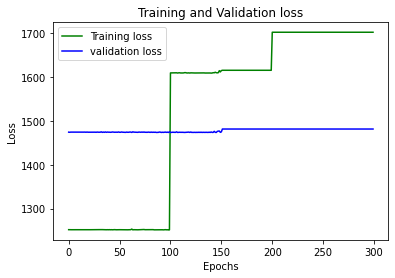

In [54]:
import matplotlib.pyplot as plt
loss_train=np.array(loss_train)
loss_train = loss_train.flatten()
loss_val=np.array(loss_val)
loss_val=loss_val.flatten()
epochs = range(0,300)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

3/3 [==============================] - 0s 4ms/step - loss: 1170.9175 - mse: 1170.9175
test loss, test acc: [1170.91748046875, 1170.91748046875]


In [56]:
results = model.evaluate(X_train, y_train, batch_size=128)
print("test loss, test acc:", results)

6/6 [==============================] - 0s 2ms/step - loss: 1702.6338 - mse: 1702.6338
test loss, test acc: [1702.6337890625, 1702.6337890625]


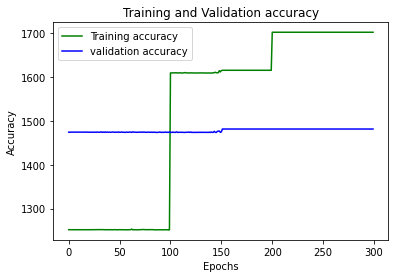

In [57]:
acc_train=np.array(acc_train)
acc_train = acc_train.flatten()
acc_val=np.array(acc_val)
acc_val=acc_val.flatten()
epochs = range(0,300)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()